In [1]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import shapely.geometry as sg
import shapely.ops as so
from descartes.patch import PolygonPatch

In [2]:

meshfile = open('test2.txt','r'); #Read .txt file
trash = 30; 
read_lines = meshfile.readlines()[trash:] #Read lines function /skips first 30 lines of .txt file
matches = []
node_tags = []
el_tags = []
x_extraction = []; y_extraction = [];
node1 = []; node2 = []; node3 = []; node4 = [];


#------------------------------------------------DATA EXTRACTION----------------------------------------------------------------
for line in read_lines: #For cycle to go over all lines in .txt
    #result.append(read_lines)
    if line.__contains__('GRID'): #Condition to read lines 'GRID (nodal points and its coordinates)'
        n_data = re.match("GRID\s+(\d+)\s{8}(.{8})(.{8})", line) #Matches all nodal data in ordered columns
        node_tags.append(int(n_data.group(1))) #Saves the numbers to 'node_tags' variable to store them globally
              
        col2 = n_data.group(2)
        col3 = n_data.group(3)
        
        if col2[4].__contains__('-'):
            col2 = col2[:4] + 'e-' + col2[5:]
            
        elif col2[5].__contains__('-'):
            col2 = col2[:5] + 'e-' + col2[6:]
        
        if col3[4].__contains__('-'):
            col3 = col3[:4] + 'e-' + col3[5:]
            
        elif col3[5].__contains__('-'):
            col3 = col3[:5] + 'e-' + col3[6:] 
            
        x_extraction.append(float(col2))      
        y_extraction.append(float(col3)) 

    try:
            el_data = re.match('CQUAD4\s+(\d+)\s+\d\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)', line) 
            el_tags.append(int(el_data.group(1)))
            node1.append(int(el_data.group(2)))
            node2.append(int(el_data.group(3)))
            node3.append(int(el_data.group(4)))
            node4.append(int(el_data.group(5)))
            
    except AttributeError:
        pass;
 
 #----------------------------------------------DATA CONVERSION-----------------------------------------------------------------        

node_tags = np.array(node_tags) 


x_extraction = np.array(x_extraction) 
y_extraction = np.array(y_extraction) 
nodal_points = np.column_stack((node_tags,x_extraction,y_extraction))
el_tags = np.array(el_tags)
node1 = np.array(node1); node2 = np.array(node2); node3 = np.array(node3); node4 = np.array(node4); 
connectivity = np.column_stack((node1,node2,node3,node4))
print(x_extraction)
#print(y_extraction)

nnodes = len(node_tags)
nelements = len(el_tags)
nperelement = (np.shape(connectivity)[1])

[8000.    7940.299 7880.597 ... 7940.245 7880.544 7940.272]


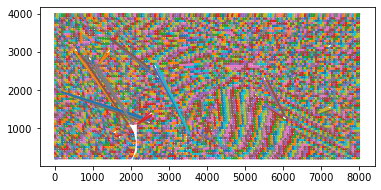

In [3]:
#--------------------------------------------------------CONNECTION-------------------------------------------------------------

for i in range(nelements):
    
     x1 = nodal_points[(np.where(nodal_points == connectivity[i][0]))[0][0]][1]
     x2 = nodal_points[(np.where(nodal_points == connectivity[i][1]))[0][0]][1] 
     x3 = nodal_points[(np.where(nodal_points == connectivity[i][2]))[0][0]][1] 
     x4 = nodal_points[(np.where(nodal_points == connectivity[i][3]))[0][0]][1] 
     
     y1 = nodal_points[(np.where(nodal_points == connectivity[i][0]))[0][0]][2] 
     y2 = nodal_points[(np.where(nodal_points == connectivity[i][1]))[0][0]][2] 
     y3 = nodal_points[(np.where(nodal_points == connectivity[i][2]))[0][0]][2]    
     y4 = nodal_points[(np.where(nodal_points == connectivity[i][3]))[0][0]][2] 

     square1 = Polygon([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])
     
     #fig, ax = plt.subplots()
     x,y = square1.exterior.xy
     plt.plot(x,y)
     plt.axis('scaled')
     #ax.add_patch(plt.Polygon(square1))
     plt.draw()
     